<a href="https://colab.research.google.com/github/BHAVATHARININ/Machine-Learning/blob/main/Random_Forest_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Loan%20Status.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
col = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
for i in col:
  print(df[i].value_counts())


LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: L

DIfference between nunique and Value Counts

In [11]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [12]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
df['Gender']=='Male'

0       True
1       True
2       True
3       True
4       True
       ...  
609    False
610     True
611     True
612     True
613    False
Name: Gender, Length: 614, dtype: bool

**Missing Value Preprocessing**

In [14]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
df.isna().sum().sum()

149

In [16]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
cols = ['Gender', 'Married', 'Dependents',
       'Self_Employed','LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
df[cols] = df[cols].replace({np.nan:df['Gender'].mode(),
                             np.nan:df['Married'].mode(),
                             np.nan:df['Dependents'].mode(),
                             np.nan:df['Self_Employed'].mode(),
                             np.nan:df['Credit_History'].mode(),
                             np.nan:df['Loan_Amount_Term'].mean(),
                             np.nan:df['LoanAmount'].mean()
                             })

In [18]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [19]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df.isna().sum().sum()

0

**Encoding**

Instead of creating Map function, Label Encoding or One hot encoding methods can be followed.

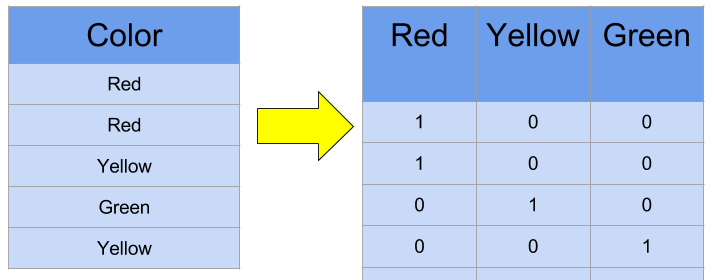

There is also an another way of Manual Encoding using Mapping with dictionaries

In [21]:
# df['Gender'] = df['Gender'].map({"Male" : 1, "Female" : 0})
# df['Married'] = df['Married'].map({"Yes" : 1, "No" : 0})

In [22]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


1.Fit(): Method calculates the parameters μ and σ and saves them as internal objects.

2.Transform(): Method using these calculated parameters apply the transformation to a particular dataset.

3.Fit_transform(): joins the fit() and transform() method for transformation of dataset.

In [23]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [24]:
# # One Hot encoding
# from sklearn.preprocessing import OneHotEncoder
# onehot = OneHotEncoder(sparse=False)
# df_encoded = pd.DataFrame(onehot.fit_transform(df[['Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'Property_Area', 'Loan_Status']]),
#                           columns = onehot.get_feature_names_out(['Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'Property_Area', 'Loan_Status']))

In [25]:
# df_encoded

In [26]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

for i in col:
  df[i] = df[i].astype(str)
  df[i] = le.fit_transform(df[i])

In [27]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,1,0,0,1,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,2,2,1,0,1,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,2,2,0,0,2,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,2,2,0,1,1,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,2,1,0,0,1,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,1,0,0,1,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,2,2,4,0,1,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,2,2,1,0,1,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,2,2,3,0,1,7583,0.0,187.000000,360.0,1.0,2,1


GET Dummies

In [28]:
print(pd.get_dummies(df['Loan_ID']))

     LP001002  LP001003  LP001005  LP001006  LP001008  LP001011  LP001013  \
0           1         0         0         0         0         0         0   
1           0         1         0         0         0         0         0   
2           0         0         1         0         0         0         0   
3           0         0         0         1         0         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
609         0         0         0         0         0         0         0   
610         0         0         0         0         0         0         0   
611         0         0         0         0         0         0         0   
612         0         0         0         0         0         0         0   
613         0         0         0         0         0         0         0   

     LP001014  LP001018  LP001020  ...  LP002959  LP002960  LP002961  \
0  

In [29]:
df.isna().sum().sum()

0

In [30]:
x = df.drop(columns=['Loan_ID','Loan_Status']).values
y = df['Loan_Status'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [31]:
x_train

array([[  2.        ,   1.        ,   0.        , ..., 360.        ,
          1.        ,   0.        ],
       [  2.        ,   1.        ,   0.        , ..., 360.        ,
          1.        ,   1.        ],
       [  2.        ,   2.        ,   1.        , ..., 360.        ,
          1.        ,   1.        ],
       ...,
       [  2.        ,   2.        ,   0.        , ..., 360.        ,
        146.41216216,   1.        ],
       [  2.        ,   2.        ,   1.        , ..., 360.        ,
          1.        ,   2.        ],
       [  2.        ,   2.        ,   4.        , ..., 360.        ,
          0.        ,   2.        ]])

In [32]:
x_test # Getting higher ranges, so moving for scaling

array([[  2.,   1.,   0., ..., 360.,   0.,   2.],
       [  2.,   2.,   3., ..., 300.,   1.,   1.],
       [  2.,   2.,   0., ..., 180.,   1.,   2.],
       ...,
       [  2.,   1.,   3., ..., 360.,   0.,   0.],
       [  2.,   2.,   0., ..., 360.,   1.,   1.],
       [  0.,   1.,   0., ..., 360.,   1.,   2.]])

**SCALING**
(Given Range -> Min Max scaling,
0 to 1 -> standard scaling)



In [33]:
from sklearn.preprocessing import StandardScaler
sta = StandardScaler()
x_train = sta.fit_transform(x_train)
x_test = sta.fit_transform(x_test)

In [34]:
x_train

array([[ 0.4867672 , -1.29198108, -0.72855804, ...,  0.32570198,
        -0.28133924, -1.31150729],
       [ 0.4867672 , -1.29198108, -0.72855804, ...,  0.32570198,
        -0.28133924, -0.05133101],
       [ 0.4867672 ,  0.7477704 , -0.01879217, ...,  0.32570198,
        -0.28133924, -0.05133101],
       ...,
       [ 0.4867672 ,  0.7477704 , -0.72855804, ...,  0.32570198,
         3.50274821, -0.05133101],
       [ 0.4867672 ,  0.7477704 , -0.01879217, ...,  0.32570198,
        -0.28133924,  1.20884527],
       [ 0.4867672 ,  0.7477704 ,  2.11050543, ...,  0.32570198,
        -0.30736242,  1.20884527]])

In [35]:
x_test

array([[ 0.46788772, -1.41541766, -0.774788  , ...,  0.28811394,
        -0.3626567 ,  1.28476417],
       [ 0.46788772,  0.6571582 ,  1.34296586, ..., -0.54299976,
        -0.34031262, -0.0321191 ],
       [ 0.46788772,  0.6571582 , -0.774788  , ..., -2.20522716,
        -0.34031262,  1.28476417],
       ...,
       [ 0.46788772, -1.41541766,  1.34296586, ...,  0.28811394,
        -0.3626567 , -1.34900238],
       [ 0.46788772,  0.6571582 , -0.774788  , ...,  0.28811394,
        -0.34031262, -0.0321191 ],
       [-3.79508929, -1.41541766, -0.774788  , ...,  0.28811394,
        -0.34031262,  1.28476417]])

Model Fitting

In [36]:
from sklearn.ensemble import RandomForestClassifier # Ensemble because this method combines 2 or 3 models and choses the best output
from sklearn.metrics import classification_report, accuracy_score
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42) # entropy -> Selects a root node randomly and performs entropy or gini index
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [37]:
# Evaluating on Training Set
y_pred_train = rfc.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       334

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [39]:
# Evaluating on Test Set
y_pred_test = rfc.predict(x_test)
print(classification_report(y_test, y_pred_test))
accuracy = accuracy_score(y_test, y_pred_test)

              precision    recall  f1-score   support

           0       0.29      0.91      0.44        35
           1       0.73      0.09      0.16        88

    accuracy                           0.33       123
   macro avg       0.51      0.50      0.30       123
weighted avg       0.60      0.33      0.24       123

